<a href="https://colab.research.google.com/github/jaraulahoneyj/Read/blob/main/Chapter%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 8 - Genetic_algorithm.py


In [3]:
import numpy as np

var_values = [1,-3,4.5,2]
num_coeff = 4
pop_chrom = 10
sel_rate = 5

pop_size = (pop_chrom,num_coeff)

pop_new = np.random.uniform(low=-10.0, high=10.0, size=pop_size)
print(pop_new)

num_gen = 100


for k in range(num_gen):
    fitness = np.sum(pop_new *var_values, axis=1)
    par_sel = np.empty((sel_rate, pop_new.shape[1]))

    print("Current generation = ", k)
    print("Best fitness value : ", np.max(fitness))

    for i in range(sel_rate):
        sel_id = np.where(fitness == np.max(fitness))
        sel_id = sel_id[0][0]
        par_sel[i, :] = pop_new[sel_id, :]
        fitness[sel_id]=np.min(fitness)

    offspring_size=(pop_chrom-sel_rate, num_coeff)
    offspring = np.empty(offspring_size)
    crossover_lenght = int(offspring_size[1]/2)
    for j in range(offspring_size[0]):
        par1_id = np.random.randint(0,par_sel.shape[0])
        par2_id = np.random.randint(0,par_sel.shape[0])
        offspring[j, 0:crossover_lenght] = par_sel[par1_id, 0:crossover_lenght]
        offspring[j, crossover_lenght:] = par_sel[par2_id, crossover_lenght:]

    for m in range(offspring.shape[0]):
        mut_val = np.random.uniform(-1.0, 1.0)
        mut_id = np.random.randint(0,par_sel.shape[1])
        offspring[m, mut_id] = offspring[m, mut_id] +mut_val
    pop_new[0:par_sel.shape[0], :] = par_sel
    pop_new[par_sel.shape[0]:, :] = offspring

fitness = np.sum(pop_new *var_values, axis=1)
best_id = np.where(fitness == np.max(fitness))
print("Optimized coefficient values = ", pop_new[best_id,:])
print("Maximum value of y = ", fitness[best_id])

[[-9.23806738  1.03614268  3.97274991 -4.16660758]
 [ 3.88288168 -5.8379657   5.6060174   0.39455939]
 [-6.87064383  2.91318099  9.48617452 -6.08304208]
 [ 8.10934772 -2.56567052  5.47235199 -3.64090493]
 [-7.57831059 -7.09702863 -5.16525066 -9.88884996]
 [ 0.82636495 -4.45034127  2.46273589  9.77087741]
 [ 4.84153194 -3.92552386  9.59492378 -9.09044356]
 [ 2.55868696 -2.11855436  7.12336562 -3.64570772]
 [ 2.11512571 -0.44906915  5.9875087  -1.64994706]
 [ 4.92596139  3.95775209  2.71631581 -5.2968062 ]]
Current generation =  0
Best fitness value :  47.41297584752703
Current generation =  1
Best fitness value :  47.41297584752703
Current generation =  2
Best fitness value :  52.14267503516947
Current generation =  3
Best fitness value :  52.14267503516947
Current generation =  4
Best fitness value :  53.81794064239588
Current generation =  5
Best fitness value :  53.81794064239588
Current generation =  6
Best fitness value :  55.33494925206022
Current generation =  7
Best fitness valu

Chapter 8- symbolic_regression.py

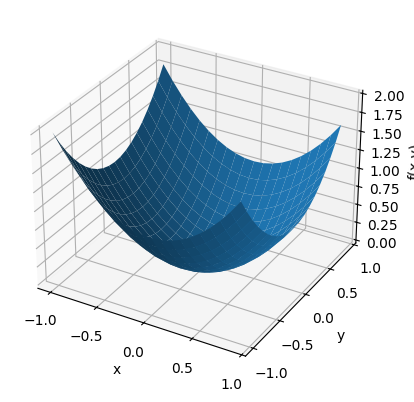

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    36.62          1.23498        7         0.269958         0.264486      6.75s
   1     9.74         0.684228       11        0.0644024        0.0620306      4.09s
   2     6.89         0.498469        7                0                0      3.79s
add(mul(X1, X1), mul(X0, X0))
R2: 1.0

R² score on test set: 1.0


In [1]:
!pip install gplearn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gplearn.genetic import SymbolicRegressor

x = np.arange(-1, 1, 1/10.)
y = np.arange(-1, 1, 1/10.)
x, y = np.meshgrid(x, y)
f_values = x**2 + y**2

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f_values)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

input_train = np.random.uniform(-1, 1, 200).reshape(100, 2)
output_train = input_train[:, 0]**2 + input_train[:, 1]**2

input_test = np.random.uniform(-1, 1, 200).reshape(100, 2)
output_test = input_test[:, 0]**2 + input_test[:, 1]**2

function_set = ['add', 'sub', 'mul']
sr_model = SymbolicRegressor(population_size=1000, function_set=function_set,
                             generations=10, stopping_criteria=0.001,
                             p_crossover=0.7, p_subtree_mutation=0.1,
                             p_hoist_mutation=0.05, p_point_mutation=0.1,
                             max_samples=0.9, verbose=1,
                             parsimony_coefficient=0.01, random_state=1)

# train model
sr_model.fit(input_train, output_train)

print(sr_model._program)
print('R2:',sr_model.score(input_test,output_test))

print("\nR² score on test set:", sr_model.score(input_test, output_test))